# Neural Networks: Learn a Quadratic Relationship

We will teach a small neural network to approximate a quadratic function of two inputs.

Steps:
- Setup (import libraries)
- Define the target quadratic function
- Build a small non-linear model
- Train the model
- Evaluate with test cases


In [1]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt
print(torch.__version__)


2.8.0


## Define the target quadratic function
We'll use `f(a, b) = 2a^2 + 3b + 1`.


In [2]:
def mystery(a, b):
    # f(a, b) = 2a^2 + 3b + 1
    return torch.tensor(2*a*a + 3*b + 1)


In [3]:
model = nn.Sequential(
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
model


Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
)

## Train the model
We sample `(a, b)` from [-2, 2] and optimize with Adam.


In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_history = []

for i in range(100000):
    a = random.uniform(-2, 2)
    b = random.uniform(-2, 2)
    desired = mystery(a, b)

    output = model(torch.tensor([a, b], dtype=torch.float32))
    loss = criterion(output.squeeze(), desired)
    loss_history.append(loss.item())

    if i % 5000 == 0:
        print(f"Loss: {loss.item():.6f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Loss: 92.743935
Loss: 0.341850
Loss: 0.042000
Loss: 0.002639
Loss: 0.000491
Loss: 0.059140
Loss: 0.000427
Loss: 0.001450
Loss: 0.010137
Loss: 0.007131
Loss: 0.014605
Loss: 0.018600
Loss: 0.003273
Loss: 0.000972
Loss: 0.030490
Loss: 0.000035
Loss: 0.017463
Loss: 0.005553
Loss: 0.000118
Loss: 0.002029


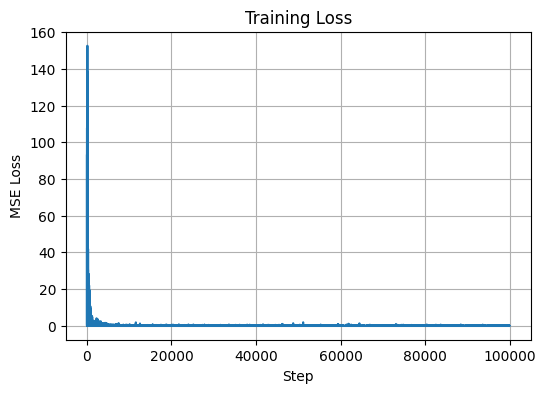

In [5]:
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


## Evaluate on sample inputs


In [6]:
test_cases = [(1.0, 1.0), (2.0, -1.0), (0.5, 0.5), (-1.0, 2.0)]

print("\nTesting the trained neural network:")
print("Input (a, b) | Neural Network Output | Expected Output | Error")
print("-" * 60)

for a, b in test_cases:
    output = model(torch.tensor([a, b], dtype=torch.float32))
    expected = mystery(a, b)
    error = abs(output.item() - expected.item())
    print(f"({a:4.1f}, {b:4.1f})    | {output.item():15.6f} | {expected.item():13.6f} | {error:.6f}")

print(f"\nFinal test - Input (1.0, 1.0):")
print(f"Neural Network Output: {model(torch.tensor([1.0, 1.0], dtype=torch.float32)).item()}")
print(f"Expected Output: {mystery(1.0, 1.0).item()}")



Testing the trained neural network:
Input (a, b) | Neural Network Output | Expected Output | Error
------------------------------------------------------------
( 1.0,  1.0)    |        5.933702 |      6.000000 | 0.066298
( 2.0, -1.0)    |        6.035359 |      6.000000 | 0.035359
( 0.5,  0.5)    |        3.053474 |      3.000000 | 0.053474
(-1.0,  2.0)    |        8.950799 |      9.000000 | 0.049201

Final test - Input (1.0, 1.0):
Neural Network Output: 5.933701992034912
Expected Output: 6.0


## Build a non-linear model
We use a few layers with ReLU activation to learn non-linear patterns.
